# The Lasso

Modified from the github repo: https://github.com/JWarmenhoven/ISLR-python which is based on the book by James et al. Intro to Statistical Learning.

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, lars_path, Lasso, LassoCV

%matplotlib inline

In [2]:
n=100
p=1000
X = np.random.randn(n,p)
X = scale(X)

In [3]:
sprob = 0.02
Sbool = np.random.rand(p) < sprob
s = np.sum(Sbool)
print("Number of non-zero's: {}".format(s))

Number of non-zero's: 24


In [4]:
mu = 100.
beta = np.zeros(p)
beta[Sbool] = mu * np.random.randn(s)

In [5]:
eps = np.random.randn(n)
y = X.dot(beta) + eps

In [6]:
larper = lars_path(X,y,method="lasso")

In [7]:
S = set(np.where(Sbool)[0])

In [8]:
np.where(Sbool)[0]

array([ 60, 100, 172, 176, 195, 263, 271, 303, 341, 375, 480, 503, 638,
       647, 684, 689, 693, 745, 768, 792, 863, 920, 955, 982])

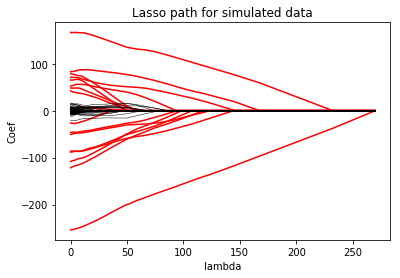

In [9]:
for j in S:
    _ = plt.plot(larper[0],larper[2][j,:],'r')
for j in set(range(p)) - S:
    _ = plt.plot(larper[0],larper[2][j,:],'k',linewidth=.5)
_ = plt.title('Lasso path for simulated data')
_ = plt.xlabel('lambda')
_ = plt.ylabel('Coef')

# Hitters dataset

Let's load the dataset from the previous lab.

In [10]:
# In R, I exported the dataset from package 'ISLR' to a csv file.
df = pd.read_csv('../data/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [12]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6+ KB
                   League_A  League_N  Division_E  Division_W  NewLeague_A  \
Player                                                                       
-Alan Ashby               0         1           0           1            0   
-Alvin Davis              1         0           0           1            1   
-Andre Dawson             0         1           1           0            0   
-Andres Galarraga         0         1           1           0            0   
-Alfredo Griffin          1         0           0           1            1   

                   NewLeague_N  
Player                          
-Alan Ashby             

In [13]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7+ KB


In [14]:
X.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


__Exercise__ Compare the previous methods to the Lasso on this dataset.  Tune $\lambda$ and compare the LOO risk to other methods (ridge, forward selection, etc.)

The following is a fast implementation of the lasso path cross-validated using LOO.  

In [15]:
loo = LeaveOneOut()
looiter = loo.split(X)
hitlasso = LassoCV(cv=looiter)
hitlasso.fit(X,y)

/Users/chang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=None, copy_X=True,
    cv=<generator object BaseCrossValidator.split at 0x11148fd58>,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
print("The selected lambda value is {:.2f}".format(hitlasso.alpha_))

The selected lambda value is 540.66


The following is the fitted coefficient vector for this chosen lambda.

In [30]:
hitlasso.coef_

array([-0.        ,  1.49586273,  0.        ,  0.        ,  0.        ,
        1.13979587, -0.        , -0.33734233,  0.82306877,  0.        ,
        0.79947238,  0.65458696, -0.03331169,  0.27575248,  0.13166923,
       -0.        ,  0.        , -0.        ,  0.        ])

In [36]:
np.mean(hitlasso.mse_path_[hitlasso.alphas_ == hitlasso.alpha_])

121023.4052103368

The above is the MSE for the selected model.  The best performance for ridge regression was roughly 120,000, so this does not outperform ridge.  We can also compare this to the selected model from forward stagewise regression:

```
[-0.21830515,  0.38154135,  0.        ,  0.        ,  0.        ,
        0.16139123,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09994524,  0.56696569, -0.16872682,  0.16924078,  0.        ,
        0.        ,  0.        , -0.19429699,  0.        ]
```

This is not exactly the same model with differences in the inclusion or exclusion of AtBat, HmRun, Runs, RBI, Years, CHmRun, Errors, League_N, Division_W, NewLeague_N

In [41]:
bforw = [-0.21830515,  0.38154135,  0.        ,  0.        ,  0.        ,
        0.16139123,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09994524,  0.56696569, -0.16872682,  0.16924078,  0.        ,
        0.        ,  0.        , -0.19429699,  0.        ]

In [44]:
print(", ".join(X.columns[(hitlasso.coef_ != 0.) != (bforw != 0.)]))

AtBat, HmRun, Runs, RBI, Years, CHmRun, Errors, League_N, Division_W, NewLeague_N
